## Walmart Data-Retail Analysis

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('Walmart_Store_sales.csv')
df['Date']=pd.to_datetime(df['Date'])
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [10]:
df.describe(datetime_is_numeric=True)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 20:18:27.692297984,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-01-10 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-12 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-03-02 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-12-10 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


In [15]:
mean_sales = []
std_sales = []
stores = df['Store'].unique()
for store in stores:
    mean_sales.append(df[df['Store'] == store]['Weekly_Sales'].mean())
    std_sales.append(df[df['Store'] == store]['Weekly_Sales'].std())


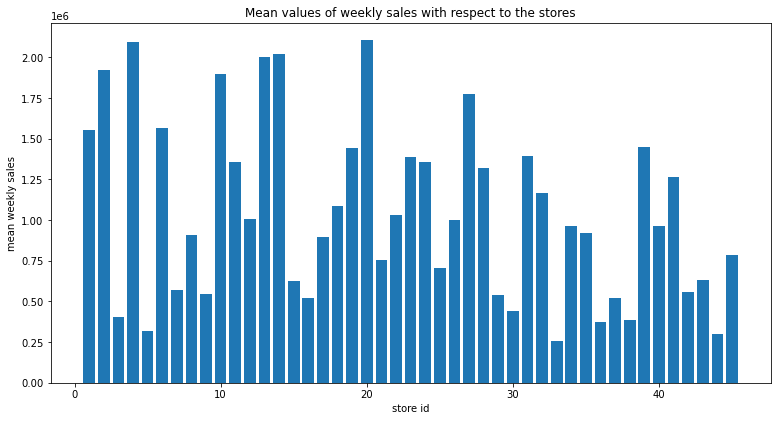

In [29]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.set_title('Mean values of weekly sales with respect to the stores')
ax.set_xlabel('store id')
ax.set_ylabel('mean weekly sales')
ax.bar(stores, mean_sales)
plt.show()

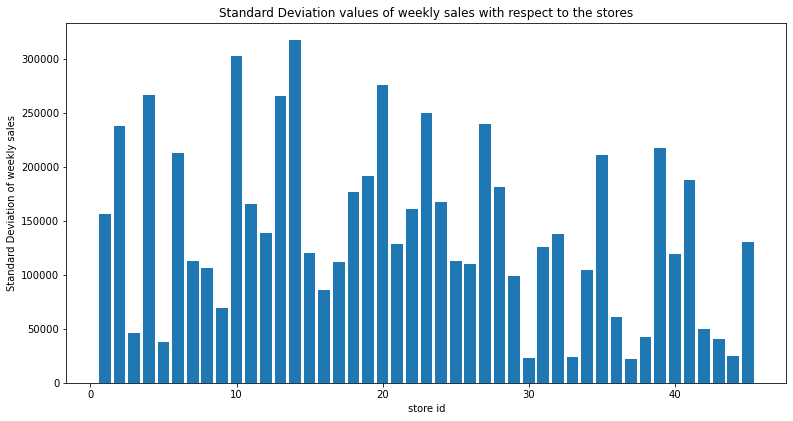

In [30]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.set_title('Standard Deviation values of weekly sales with respect to the stores')
ax.set_xlabel('store id')
ax.set_ylabel('Standard Deviation of weekly sales')
ax.bar(stores, std_sales)
plt.show()

In [36]:
ratio_df = pd.DataFrame(data={
    "store": stores,
    "mean": mean_sales,
    "std": std_sales,
})
ratio_df

,store,mean,std
0,1,1.555264e+06,155980.767761
1,2,1.925751e+06,237683.694682
2,3,4.027044e+05,46319.631557
3,4,2.094713e+06,266201.442297
4,5,3.180118e+05,37737.965745
5,6,1.564728e+06,212525.855862
6,7,5.706173e+05,112585.469220
7,8,9.087495e+05,106280.829881
8,9,5.439806e+05,69028.666585
9,10,1.899425e+06,302262.062504
